### Handwritten Digits Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()         #loading the dataset

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train), len(x_test) , x_train[0].shape                                     

(60000, 10000, (28, 28))

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
plt.matshow(x_train[0])

In [ ]:
 y_train[0]

5

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [8]:
x_train_flattened.shape

(60000, 784)

In [9]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Simple Neural Network with no hidden layers

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4669 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9258


In [11]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.9261


[0.2670414447784424, 0.9261000156402588]

In [12]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([3.2629758e-02, 2.7402996e-07, 7.3886625e-02, 9.6808451e-01,
       2.8206769e-03, 1.4571027e-01, 1.3829662e-06, 9.9984163e-01,
       1.1724276e-01, 6.7290336e-01], dtype=float32)

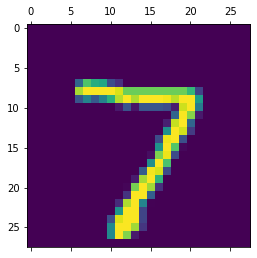

In [13]:
plt.matshow(x_test[0])

In [14]:
np.argmax(y_predicted[0]) #np.argmax finds a maximum elements from an array and returns the index of it.

7

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1108,    4,    1,    0,    1,    4,    2,   15,    0],
       [   7,    7,  931,   11,    8,    3,   11,    9,   40,    5],
       [   3,    0,   24,  912,    0,   25,    3,   12,   24,    7],
       [   2,    1,    3,    1,  910,    0,   12,    4,   10,   39],
       [   9,    2,    5,   31,    9,  770,   14,    7,   38,    7],
       [  12,    3,    9,    1,    7,    9,  911,    2,    4,    0],
       [   1,    5,   26,    3,    8,    0,    0,  950,    4,   31],
       [   5,    5,    6,   16,    9,   19,    9,   12,  886,    7],
       [   9,    7,    2,    8,   26,    5,    0,   23,    9,  920]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

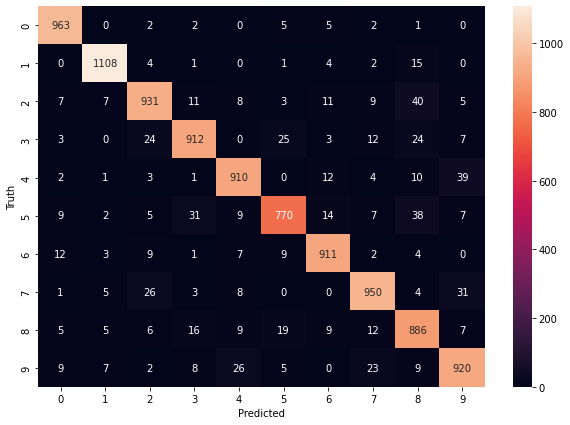

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using hidden layer

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2687 - accuracy: 0.9241
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1174 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0822 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0633 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0508 - accuracy: 0.9847


In [19]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9752


[0.0793415755033493, 0.9751999974250793]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

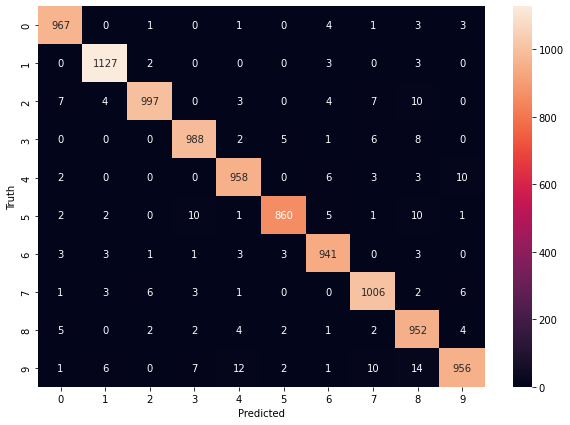

In [20]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2698 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1232 - accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0858 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0652 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0518 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0409 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0237 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.019

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0769 - accuracy: 0.9797


[0.0769253745675087, 0.9797000288963318]